In [1]:
import matplotlib.pyplot as plt 
import numpy as np
# import math
from preprocessing.datamodel import SlideManager #, Slide
from preprocessing.processing import generator_live_tiles, rgb2gray, apply_image_filters #, get_otsu_threshold #apply_image_filters, remove_alpha_channel, rgb2gray, create_tumor_mask, ProgressBar, create_otsu_mask_by_threshold, generate_testing_slide
# from generate_tiles import get_otsu_threshold
# from preprocessing.histopath import pil_to_np_rgb, np_to_pil, mask_rgb
from skimage.filters import threshold_otsu


In [2]:
CAM_BASE_DIR = '/media/nico/data/fourthbrain/project/'
CAM16_DIR = CAM_BASE_DIR + 'CAMELYON16/'
GENERATED_DATA = CAM_BASE_DIR + 'tiles/'

In [3]:
mgr = SlideManager(cam16_dir=CAM16_DIR)

In [4]:
i = 2
level = 4
tile_size=256
overlap = 0
verbose = True
poi = 0.5

In [5]:
slide = mgr.negative_slides[i]

In [6]:
# load the slide into numpy array
arr = np.asarray(slide.get_full_slide(level=level))

In [7]:
# convert it to gray scale
arr_gray = rgb2gray(arr)
# calculate otsu threshold
threshold = threshold_otsu(arr_gray)

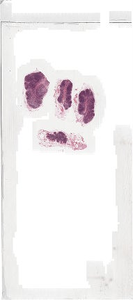

In [8]:
slide.get_thumbnail((300, 300))  # openslide method

In [9]:
mask_filters = apply_image_filters(arr, remove_object_size=5000, remove_holes_size=3000)

Remove Small Objs    | Time: 0:00:00.675081  Type: bool    Shape: (13824, 6112)
Remove Small Holes   | Time: 0:00:00.792880  Type: bool    Shape: (13824, 6112)


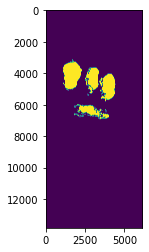

In [10]:
plt.imshow(mask_filters)

In [11]:
# create a new and unconsumed tile iterator
# because we have so many  negative slides we do not use overlap
iter_explore_tiles = generator_live_tiles(slide, level, threshold, poi, tile_size, overlap, verbose=False)

In [12]:
v = list()
for a, b, c, d  in iter_explore_tiles:
    v.append([a, b, c, d])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


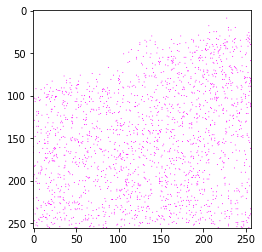

In [13]:
plt.imshow(v[0][0])

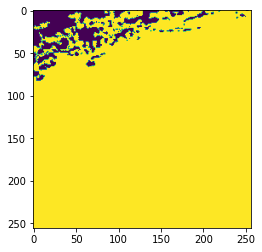

In [14]:
plt.imshow(v[0][1])